In [22]:
from music21 import *

note1 = note.Note("C4")
note1.duration.type = 'half'
note2 = note.Note("F#4")
note3 = note.Note("B-2")

stream1 = stream.Stream()
stream1.id = 'some notes'
stream1.append(note1)
stream1.append(note2)
stream1.append(note3)

biggerStream = stream.Stream()
note2 = note.Note("D#5")
biggerStream.insert(0, note2)
biggerStream.append(stream1)

In [23]:
biggerStream.show('text')

{0.0} <music21.note.Note D#>
{1.0} <music21.stream.Stream some notes>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note F#>
    {3.0} <music21.note.Note B->


In [24]:
help(note.Note)

Help on class Note in module music21.note:

class Note(NotRest)
 |  One of the most important music21 classes, a Note
 |  stores a single note (that is, not a rest or an unpitched element)
 |  that can be represented by one or more notational units -- so
 |  for instance a C quarter-note and a D# eighth-tied-to-32nd are both
 |  a single Note object.
 |  
 |  
 |  A Note knows both its total duration and how to express itself as a set of
 |  tied notes of different lengths. For instance, a note of 2.5 quarters in
 |  length could be half tied to eighth or dotted quarter tied to quarter.
 |  
 |  
 |  The first argument to the Note is the pitch name (with or without
 |  octave, see the introduction to :class:`music21.pitch.Pitch`).
 |  Further arguments can be specified as keywords (such as type, dots, etc.)
 |  and are passed to the underlying :class:`music21.duration.Duration` element.
 |  
 |  
 |  Two notes are considered equal if their most important attributes
 |  (such as pitch, 

# Accessing Scores, Parts, Measures, and Notes

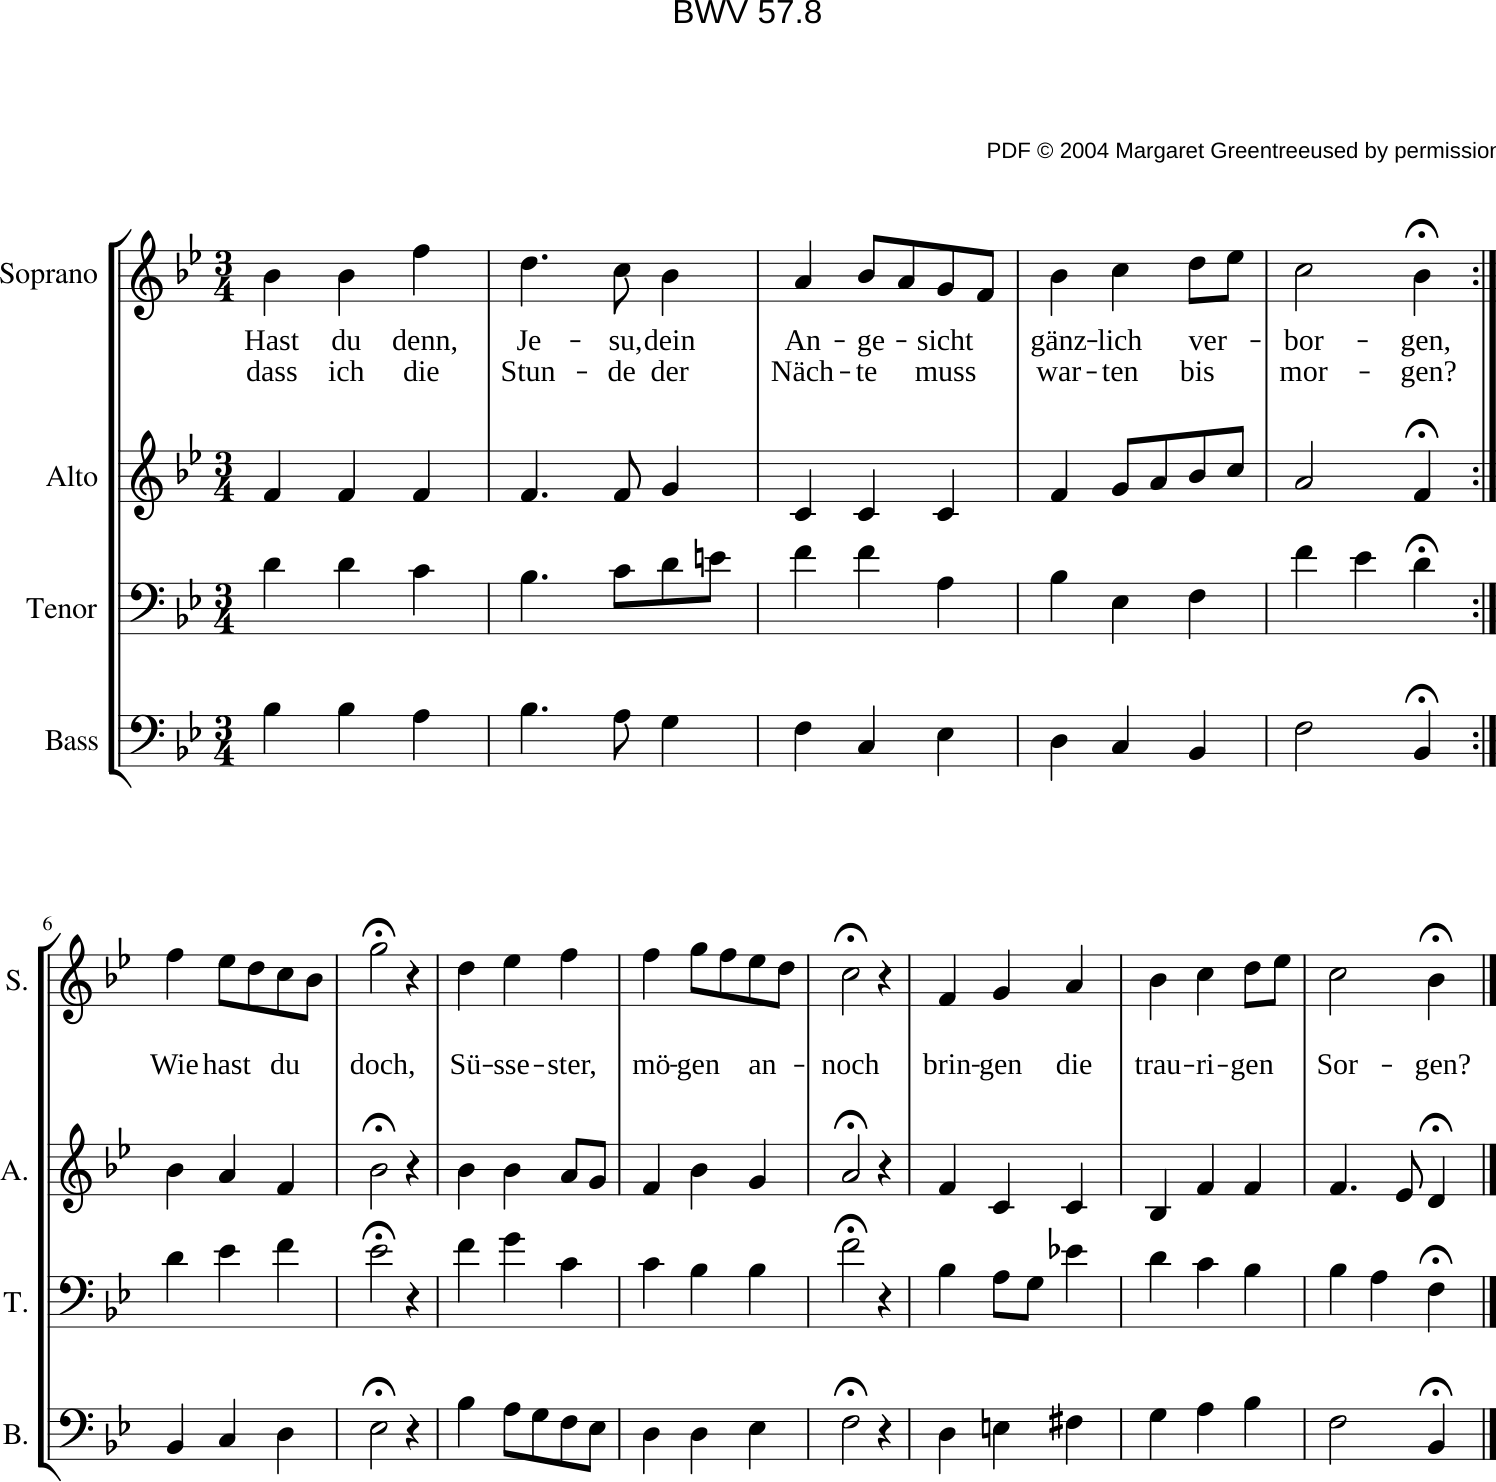

In [25]:
sBach = corpus.parse('bach/bwv57.8')
sBach.show()

In [26]:
sBach.show('midi')

In [27]:
sBach.show('text')

{0.0} <music21.text.TextBox "PDF © 2004...">
{0.0} <music21.text.TextBox "BWV 57.8">
{0.0} <music21.metadata.Metadata object at 0x7fa79d13e198>
{0.0} <music21.stream.Part Soprano>
    {0.0} <music21.instrument.Instrument 'P1: Soprano: '>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.layout.SystemLayout>
        {0.0} <music21.clef.TrebleClef>
        {0.0} <music21.key.Key of B- major>
        {0.0} <music21.meter.TimeSignature 3/4>
        {0.0} <music21.note.Note B->
        {1.0} <music21.note.Note B->
        {2.0} <music21.note.Note F>
    {3.0} <music21.stream.Measure 2 offset=3.0>
        {0.0} <music21.note.Note D>
        {1.5} <music21.note.Note C>
        {2.0} <music21.note.Note B->
    {6.0} <music21.stream.Measure 3 offset=6.0>
        {0.0} <music21.note.Note A>
        {1.0} <music21.note.Note B->
        {1.5} <music21.note.Note A>
        {2.0} <music21.note.Note G>
        {2.5} <music21.note.Note F>
    {9.0} <music21.stream.Measure 4 offset

In [28]:
type(sBach)

music21.stream.Score

In [29]:
len(sBach)

9

In [30]:
len(sBach[3])

14

In [31]:
len(sBach[3][1])

7

In [32]:
len(sBach.getElementsByClass(stream.Part))

4

In [33]:
len(sBach.getElementsByClass(stream.Part)[0].getElementsByClass(stream.Measure))

13

In [34]:
len(sBach.getElementsByClass('Part'))

4

In [35]:
list(sBach.parts)

[<music21.stream.Part Soprano>,
 <music21.stream.Part Alto>,
 <music21.stream.Part Tenor>,
 <music21.stream.Part Bass>]

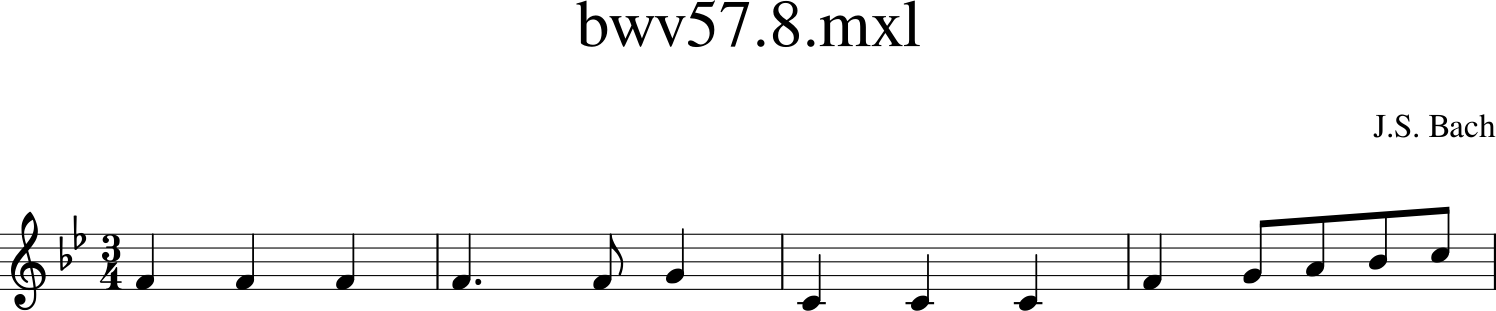

In [36]:
alto = sBach.parts[1]
excerpt = alto.measures(1, 4)
excerpt.show()

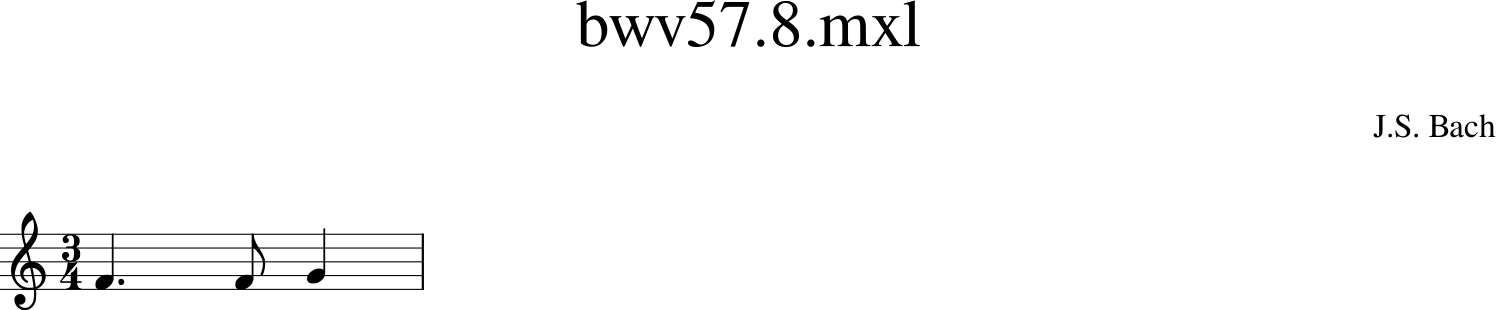

In [37]:
measure2 = alto.measure(2)
measure2.show()

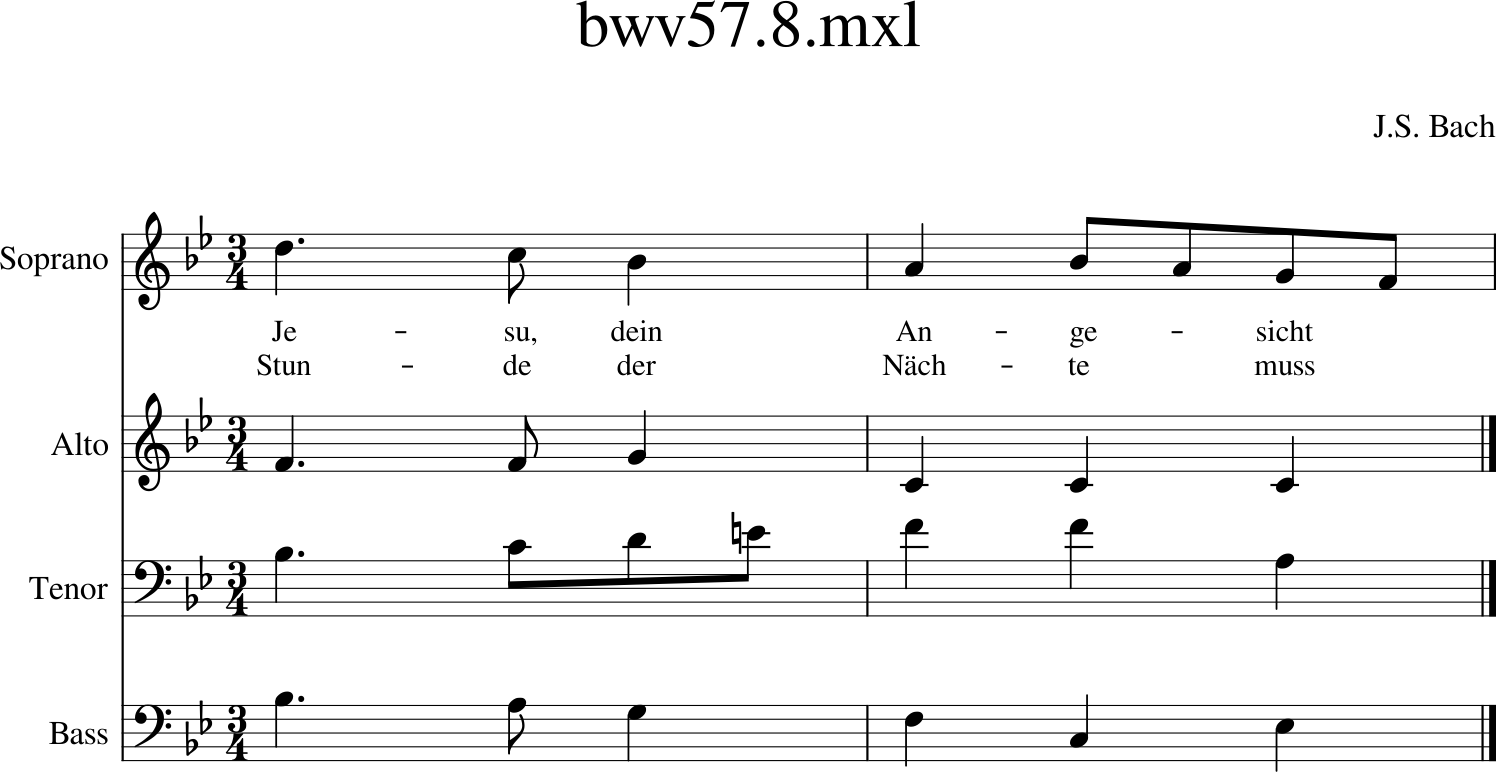

In [17]:
measureStack = sBach.measures(2, 3)
measureStack.show()

# Recursion in Streams

In [38]:
s = stream.Score(id='mainScore')
p0 = stream.Part(id='part0')
p1 = stream.Part(id='part1')

m01 = stream.Measure(number=1)
m01.append(note.Note('C', type="whole"))
m02 = stream.Measure(number=2)
m02.append(note.Note('D', type="whole"))
p0.append([m01, m02])

m11 = stream.Measure(number=1)
m11.append(note.Note('E', type="whole"))
m12 = stream.Measure(number=2)
m12.append(note.Note('F', type="whole"))
p1.append([m11, m12])

s.insert(0, p0)
s.insert(0, p1)
s.show('text')

{0.0} <music21.stream.Part part0>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note C>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note D>
{0.0} <music21.stream.Part part1>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.note.Note E>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note F>


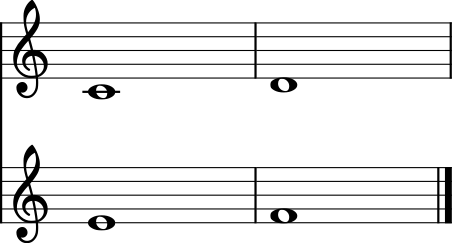

In [39]:
s.show()

In [20]:
play(s)

NameError: name 'play' is not defined

In [40]:
for el in s.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.stream.Part part0> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part0>
0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.stream.Part part1> <music21.stream.Score mainScore>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.Part part1>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
4.0 <music21.stream.Measure 2 offset=4.0> <music21.stream.Part part1>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


In [41]:
for el in s.recurse().notes:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note D> <music21.stream.Measure 2 offset=4.0>
0.0 <music21.note.Note E> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Note F> <music21.stream.Measure 2 offset=4.0>


# Flattening a Stream

In [42]:
for el in s.flat:
    print(el.offset, el, el.activeSite)

0.0 <music21.note.Note C> <music21.stream.Score mainScore_flat>
0.0 <music21.note.Note E> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note D> <music21.stream.Score mainScore_flat>
4.0 <music21.note.Note F> <music21.stream.Score mainScore_flat>


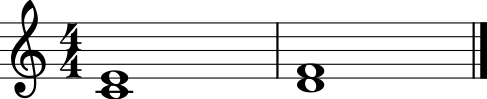

In [43]:
s.flat.show()

In [44]:
len(sBach.flat.getElementsByClass(note.Note))

150

In [45]:
m = sBach.parts[0].getElementsByClass('Measure')[7]
m.getOffsetBySite(sBach.parts[0])

21.0

In [46]:
n = sBach.parts[0].measure(8).notes[1]
n

<music21.note.Note E->

In [47]:
n.getOffsetBySite(m)

1.0

In [48]:
n.offset

1.0

In [49]:
pFlat = sBach.parts[0].flat
pFlat

<music21.stream.Part Soprano_flat>

In [50]:
indexN = pFlat.index(n)
indexN

32

In [51]:
pFlat[indexN]

<music21.note.Note E->

In [52]:
pFlat[indexN].offset

22.0

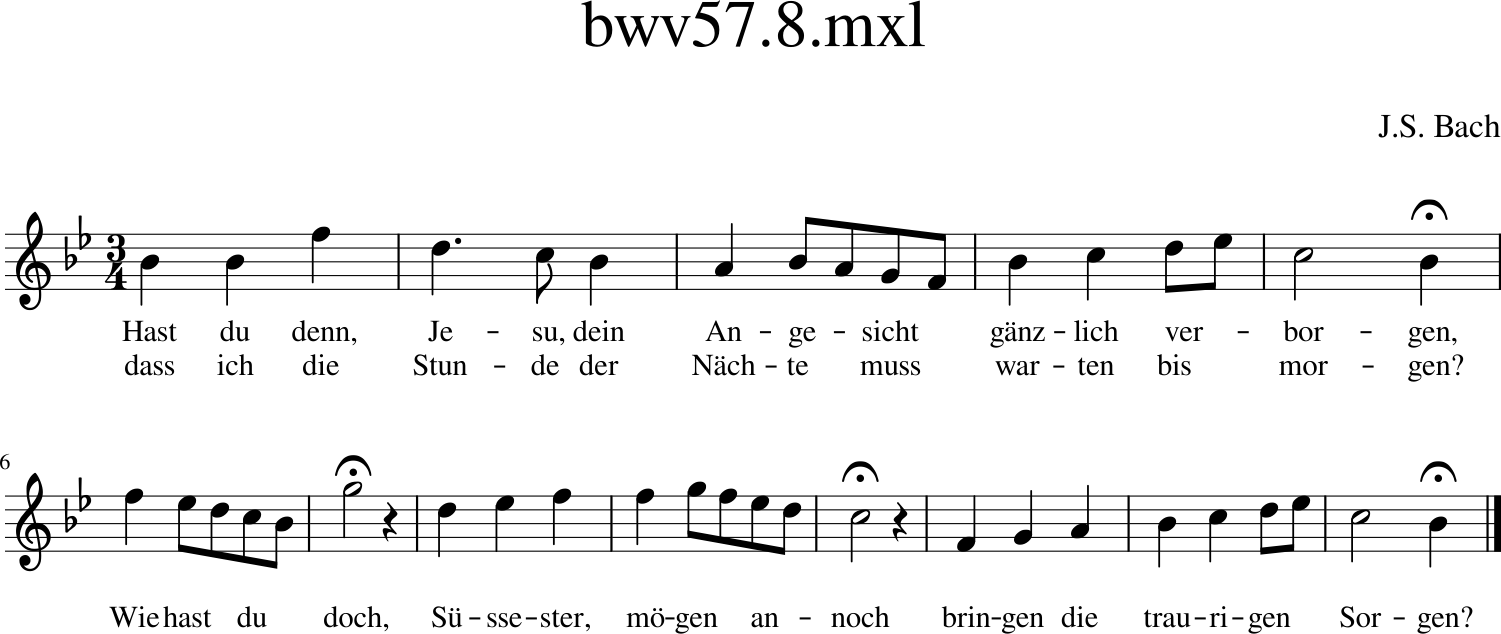

In [47]:
pFlat.show()

# Test of the MIDI issue

In [53]:
import music21 as m
import copy

def play(x):
    """
    Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """
    if isinstance(x, m.stream.Stream):
        x = copy.deepcopy(x)
        for subStream in x.recurse(streamsOnly=True, includeSelf=True):
            mss = subStream.getElementsByClass(m.stream.Measure)
            for ms in mss:
                ms.offset += 1.0
    if isinstance(x, m.note.Note):
        s = m.stream.Stream()
        s.append(m.note.Rest(1))
        s.append(x)
        x = s
    x.show('midi')

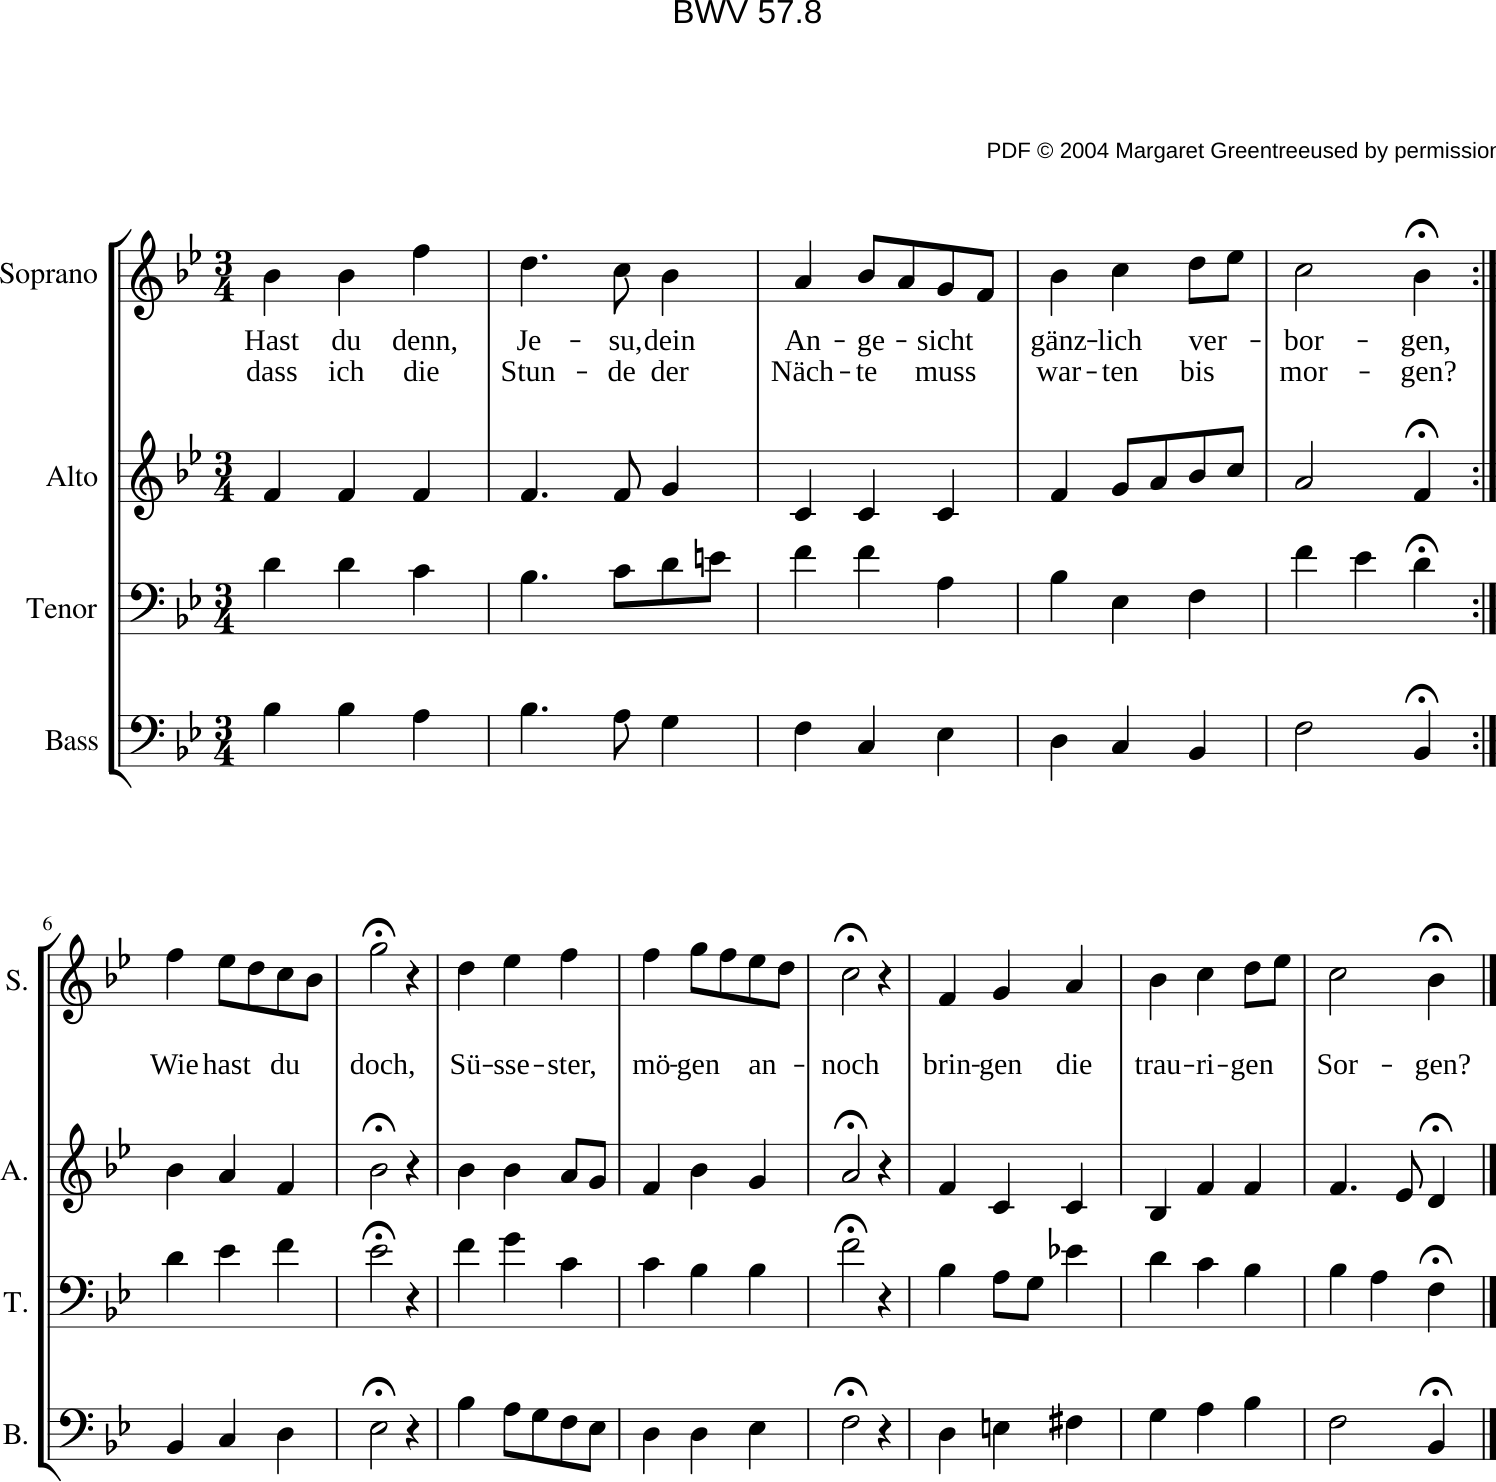

In [54]:
sBach.show()

In [55]:
play(sBach)